<a href="https://colab.research.google.com/github/rachelhostetler/ABCAtlas_UseCases/blob/main/Calculating_DE_genes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Allen Brain Cell Atlas 10x DE Genes Use Case

This notebook is an example of how to use data from the Allen Brain Cell (ABC) Atas. Code for this notebook comes from [ABC Atlas Access](https://www.google.com/url?q=https%3A%2F%2Falleninstitute.github.io%2Fabc_atlas_access%2Fintro.html), which features in depth tutorials on ABC Atlas scRNAseq and MERFISH datasets. Use ABC Atlas Access to learn more about each of the datasets. The text following '#' are comments and/or indicate where the code can be edited to look at different brain regions, cell types, etc. This notebook is intended to be used in Google Colab.

## Use Case Description

A scientist studies Parkinson's Disease models in mice. They are looking at inhbitiory cells in the striatum and pallidum in the whole mouse brain 10x scRNAseq data. Using the ABC Atlas, they find the supertypes 0259 PAL-STR Gaba-Chol and 0260 PAL-STR Gaba-Chol. Next, they want to find out which genes are differentially expressed between the two supertypes. [Here](https://knowledge.brain-map.org/abcatlas#AQIBQVA4Sk5ONUxZQUJHVk1HS1kxQgACUTFOQ1dXUEc2RlowRE5JWEpCUQADBAFGUzAwRFhWMFQ5UjFYOUZKNFFFAAIAAAFRWTVTOEtNTzVITEpVRjBQMDBLAAIAAAExNUJLNDdEQ0lPRjFTTExVVzlQAAIBMDI1OSBQQUwtU1RSIEdhYmEtQ2hvbF8xAAABQ0JHQzBVMzBWVjlKUFI2MFRKVQACAAAEAQECgPf8zIL2QisDgIRYpYGUnAYABQAGAQECMTVCSzQ3RENJT0YxU0xMVVc5UAADfgAAAAQAAAhHNEk0R0ZKWEpCOUFUWjNQVFgxAAlMVkRCSkFXOEJJNVlTUzFRVUJHAAoACwFub25lAAJub25lAAMBBAEAAiMwMDAwMDAAA8gBAAUBAQIjMDAwMDAwAAPIAQAAAAFBUDhKTk41TFlBQkdWTUdLWTFCAAJRMU5DV1dQRzZGWjBETklYSkJRAAMEAUZTMDBEWFYwVDlSMVg5Rko0UUUAAgAAAVFZNVM4S01PNUhMSlVGMFAwMEsAAgAAATE1Qks0N0RDSU9GMVNMTFVXOVAAAgEwMjYwIFBBTC1TVFIgR2FiYS1DaG9sXzIAAAFDQkdDMFUzMFZWOUpQUjYwVEpVAAIAAAQBAQKA9%2FzMgvZCKwOAhFilgZScBgAFAAYBAQIxNUJLNDdEQ0lPRjFTTExVVzlQAAN%2BAAAABAAACEc0STRHRkpYSkI5QVRaM1BUWDEACUxWREJKQVc4Qkk1WVNTMVFVQkcACgALAW5vbmUAAm5vbmUAAwEEAQACIzAwMDAwMAADyAEABQEBAiMwMDAwMDAAA8gBAAAAAgMA) are the cells they are studying in the ABC Atlas.

Goal: Caluculate differentially expressed genes between 0259 PAL-STR Gaba-Chol and 0260 PAL-STR Gaba-Chol supertypes.

Note: this notebook uses Wilcoxon rank-sum test from Scanpy toolkit to rank differentially expressed genes; we recommend using this notebook for preliminary analysis and following up with other statistial methods.

In [ ]:
# Install s3fs package
!apt install s3fs

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  s3fs
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 297 kB of archives.
After this operation, 794 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 s3fs amd64 1.90-1 [297 kB]
Fetched 297 kB in 0s (1,085 kB/s)
Selecting previously unselected package s3fs.
(Reading database ... 126308 files and directories currently installed.)
Preparing to unpack .../archives/s3fs_1.90-1_amd64.deb ...
Unpacking s3fs (1.90-1) ...
Setting up s3fs (1.90-1) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
# Make directory to mount s3 data into
!mkdir -p /data/abc_atlas

In [ ]:
# Mount the s3 bucket using s3fs-fuse
!s3fs -o public_bucket=1 -o default_acl=public-read -o endpoint="us-west-2" allen-brain-cell-atlas /data/abc_atlas

In [ ]:
# Check that it's mounted
!ls -ltrh /data/abc_atlas

total 35K
drwxr-x--- 1 root root   0 Dec 31  1969 releases
drwxr-x--- 1 root root   0 Dec 31  1969 metadata
drwxr-x--- 1 root root   0 Dec 31  1969 mapmycells
drwxr-x--- 1 root root   0 Dec 31  1969 image_volumes
drwxr-x--- 1 root root   0 Dec 31  1969 expression_matrices
-rw-r----- 1 root root 32K Jun  7  2023 index.html


In [ ]:
# Install abc_atlas_access
%pip install "abc_atlas_access[notebooks] @ git+https://github.com/alleninstitute/abc_atlas_access.git"

  Cloning https://github.com/alleninstitute/abc_atlas_access.git to /tmp/pip-install-mi8dw9xs/abc-atlas-access_29e4d81036324df79ea075cf9d12d9f7
  Running command git clone --filter=blob:none --quiet https://github.com/alleninstitute/abc_atlas_access.git /tmp/pip-install-mi8dw9xs/abc-atlas-access_29e4d81036324df79ea075cf9d12d9f7
  Resolved https://github.com/alleninstitute/abc_atlas_access.git to commit 398c9cc557a4b1e75dc68dd3d4965d3ed50367b2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━

In [ ]:
from pathlib import Path
from abc_atlas_access.abc_atlas_cache.abc_project_cache import AbcProjectCache

In [ ]:
download_base = Path('/data/abc_atlas')
abc_cache = AbcProjectCache.from_local_cache(download_base)

abc_cache.current_manifest

/usr/local/lib/python3.11/dist-packages/abc_atlas_access/abc_atlas_cache/cloud_cache.py:470: MissingLocalManifestWarning: This cache directory appears to contain data files, but it has no record of what those files are. Unless running as a LocalCache, files will be re-downloaded.
  warnings.warn(msg, MissingLocalManifestWarning)
/usr/local/lib/python3.11/dist-packages/abc_atlas_access/abc_atlas_cache/cloud_cache.py:1373: ReadOnlyLocalCacheWarning: LocalCache is a read only directory and cannot
                save the last used manifest.
                Current Manifest: releases/20250531/manifest.json
  warnings.warn(


'releases/20250531/manifest.json'

In [ ]:
abc_cache.list_directories

['ASAP-PMDBS-10X',
 'ASAP-PMDBS-taxonomy',
 'Allen-CCF-2020',
 'HMBA-10xMultiome-BG',
 'HMBA-10xMultiome-BG-Aligned',
 'HMBA-BG-taxonomy-CCN20250428',
 'MERFISH-C57BL6J-638850',
 'MERFISH-C57BL6J-638850-CCF',
 'MERFISH-C57BL6J-638850-imputed',
 'MERFISH-C57BL6J-638850-sections',
 'SEAAD',
 'SEAAD-taxonomy',
 'WHB-10Xv3',
 'WHB-taxonomy',
 'WMB-10X',
 'WMB-10XMulti',
 'WMB-10Xv2',
 'WMB-10Xv3',
 'WMB-neighborhoods',
 'WMB-taxonomy',
 'Zeng-Aging-Mouse-10Xv3',
 'Zeng-Aging-Mouse-WMB-taxonomy',
 'Zhuang-ABCA-1',
 'Zhuang-ABCA-1-CCF',
 'Zhuang-ABCA-2',
 'Zhuang-ABCA-2-CCF',
 'Zhuang-ABCA-3',
 'Zhuang-ABCA-3-CCF',
 'Zhuang-ABCA-4',
 'Zhuang-ABCA-4-CCF']

The data set show in the ABC Atlas link above, and the one used for the calculation below is 'WMB-10X', which is split into multiple studies based on data modality for gene expression ('WMB-10XMulti', 'WMB-10Xv2', and 'WMB-10Xv3'), and which uses has cell types assigned to the 'WMB-taxonomy'. We note that gene expression values from cells collected using different data modalities are not always directly comparable, and recomment only including cells from one data modality in the calculation (as shown below).

After first importing the relevant python packages, the code below will join information from these various WMB directories to perform the requested differential expression.

In [ ]:
import pandas as pd
from pathlib import Path
import numpy as np
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
%pip install scanpy
import scanpy as sc

from abc_atlas_access.abc_atlas_cache.abc_project_cache import AbcProjectCache

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.5 MB/s eta 0:00:00


In [ ]:
# load metadata for all cells in the WMB-10X dataset
# NOTE: if you want to perform this analysis on a different dataset in the abc_cache, edit the directory parameter below, and in all subsequent steps
cell_metadata = abc_cache.get_metadata_dataframe(
    directory='WMB-10X', #change dataset here
    file_name='cell_metadata'
)
cell_metadata

,cell_label,cell_barcode,barcoded_cell_sample_label,library_label,feature_matrix_label,entity,brain_section_label,library_method,region_of_interest_acronym,donor_label,donor_genotype,donor_sex,dataset_label,x,y,cluster_alias,abc_sample_id
0,GCGAGAAGTTAAGGGC-410_B05,GCGAGAAGTTAAGGGC,410_B05,L8TX_201030_01_C12,WMB-10Xv3-HPF,cell,NaN,10Xv3,RHP,Snap25-IRES2-Cre;Ai14-550850,Ai14(RCL-tdT)/wt,F,WMB-10Xv3,23.146826,-3.086639,1,484be5df-5d44-4bfe-9652-7b5bc739c211
1,AATGGCTCAGCTCCTT-411_B06,AATGGCTCAGCTCCTT,411_B06,L8TX_201029_01_E10,WMB-10Xv3-HPF,cell,NaN,10Xv3,RHP,Snap25-IRES2-Cre;Ai14-550851,Ai14(RCL-tdT)/wt,F,WMB-10Xv3,23.138481,-3.022000,1,5638505d-e1e8-457f-9e5b-59e3e2302417
2,AACACACGTTGCTTGA-410_B05,AACACACGTTGCTTGA,410_B05,L8TX_201030_01_C12,WMB-10Xv3-HPF,cell,NaN,10Xv3,RHP,Snap25-IRES2-Cre;Ai14-550850,Ai14(RCL-tdT)/wt,F,WMB-10Xv3,23.472557,-2.992709,1,a0544e29-194f-4d34-9af4-13e7377b648f
3,CACAGATAGAGGCGGA-410_A05,CACAGATAGAGGCGGA,410_A05,L8TX_201029_01_A10,WMB-10Xv3-HPF,cell,NaN,10Xv3,RHP,Snap25-IRES2-Cre;Ai14-550850,Ai14(RCL-tdT)/wt,F,WMB-10Xv3,23.379622,-3.043442,1,c777ac0b-77e1-4d76-bf8e-2b3d9e08b253
4,AAAGTGAAGCATTTCG-410_B05,AAAGTGAAGCATTTCG,410_B05,L8TX_201030_01_C12,WMB-10Xv3-HPF,cell,NaN,10Xv3,RHP,Snap25-IRES2-Cre;Ai14-550850,Ai14(RCL-tdT)/wt,F,WMB-10Xv3,23.909480,-2.601536,1,49860925-e82b-46df-a228-fd2f97e75d39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4042971,GTGTGAGCAAACGCGA-1350_C05,GTGTGAGCAAACGCGA,1350_C05,L8XR_220728_01_A05,WMB-10XMulti,cell,NaN,10xRSeq_Mult,MB,C57BL6J-641405,wt/wt,M,WMB-10XMulti,-7.716915,0.223654,8861,ba1d0e38-bea7-4d4f-bfcd-49121938e743
4042972,TTAGCAATCCCTGTTA-1350_C05,TTAGCAATCCCTGTTA,1350_C05,L8XR_220728_01_A05,WMB-10XMulti,cell,NaN,10xRSeq_Mult,MB,C57BL6J-641405,wt/wt,M,WMB-10XMulti,-3.115098,-3.024478,8215,342bd0bb-cbe5-479b-9c70-fef59a730255
4042973,TTTGGCTGTCGCGCAA-1350_C05,TTTGGCTGTCGCGCAA,1350_C05,L8XR_220728_01_A05,WMB-10XMulti,cell,NaN,10xRSeq_Mult,MB,C57BL6J-641405,wt/wt,M,WMB-10XMulti,-7.950964,0.409335,8798,4634de09-d8e0-4e40-a49b-eba311de08b5
4042974,ATCCACCTCACAGACT-1320_B04,ATCCACCTCACAGACT,1320_B04,L8XR_220630_02_B10,WMB-10XMulti,cell,NaN,10xRSeq_Mult,OLF,C57BL6J-625156,wt/wt,F,WMB-10XMulti,4.579441,12.135833,8798,5b3061de-1cb8-47b6-9368-52824e1031ce


In [ ]:
# load gene metadata for chosen cell dataset
gene_metadata = abc_cache.get_metadata_dataframe(
    directory='WMB-10X',
    file_name='gene'
)
gene_metadata

,gene_identifier,gene_symbol,name,mapped_ncbi_identifier,comment
0,ENSMUSG00000051951,Xkr4,X-linked Kx blood group related 4,NCBIGene:497097,NaN
1,ENSMUSG00000089699,Gm1992,predicted gene 1992,NaN,NaN
2,ENSMUSG00000102331,Gm19938,"predicted gene, 19938",NaN,NaN
3,ENSMUSG00000102343,Gm37381,"predicted gene, 37381",NaN,NaN
4,ENSMUSG00000025900,Rp1,retinitis pigmentosa 1 (human),NCBIGene:19888,NaN
...,...,...,...,...,...
32280,ENSMUSG00000095523,AC124606.1,PRAME family member 8-like,NCBIGene:100038995,no expression
32281,ENSMUSG00000095475,AC133095.2,uncharacterized LOC545763,NCBIGene:545763,no expression
32282,ENSMUSG00000094855,AC133095.1,uncharacterized LOC620639,NCBIGene:620639,no expression
32283,ENSMUSG00000095019,AC234645.1,NaN,NaN,no expression


In [ ]:
# load cluster annotation data
cluster_membership = abc_cache.get_metadata_dataframe(
    directory='WMB-taxonomy',
    file_name='cluster_to_cluster_annotation_membership'
)
cluster_membership

,cluster_annotation_term_label,cluster_annotation_term_set_label,cluster_alias,cluster_annotation_term_name,cluster_annotation_term_set_name,number_of_cells,color_hex_triplet
0,CS20230722_CLUS_0001,CCN20230722_CLUS,128,0001 CLA-EPd-CTX Car3 Glut_1,cluster,4262,#00664E
1,CS20230722_CLUS_0002,CCN20230722_CLUS,129,0002 CLA-EPd-CTX Car3 Glut_1,cluster,3222,#5C79CC
2,CS20230722_CLUS_0003,CCN20230722_CLUS,130,0003 CLA-EPd-CTX Car3 Glut_1,cluster,12216,#86FF4D
3,CS20230722_CLUS_0004,CCN20230722_CLUS,143,0004 CLA-EPd-CTX Car3 Glut_1,cluster,9334,#CC563D
4,CS20230722_CLUS_0005,CCN20230722_CLUS,131,0005 CLA-EPd-CTX Car3 Glut_2,cluster,1056,#E7FF26
...,...,...,...,...,...,...,...
26605,CS20230722_NEUR_NA,CCN20230722_NEUR,5279,NaN,neurotransmitter,182,#666666
26606,CS20230722_NEUR_NA,CCN20230722_NEUR,5275,NaN,neurotransmitter,45,#666666
26607,CS20230722_NEUR_NA,CCN20230722_NEUR,5272,NaN,neurotransmitter,28,#666666
26608,CS20230722_NEUR_NA,CCN20230722_NEUR,5274,NaN,neurotransmitter,132,#666666


In [ ]:
# choose which supertypes to target
# NOTE: If you want to compare different supertypes, you would do that at this step!
supertype_1 = '0259 PAL-STR Gaba-Chol_1' # edit supertypes wthin the subclass here
supertype_2 = '0260 PAL-STR Gaba-Chol_2' # edit supertypes wthin the subclass here

In [ ]:
taxonomy_subset = cluster_membership[(cluster_membership.cluster_annotation_term_name == supertype_1) | (cluster_membership.cluster_annotation_term_name == supertype_2)]
desired_aliases = set(taxonomy_subset.cluster_alias.values)

In [ ]:
# choose which 10x chemistry version (platform) to use (ABC Atlas shows us that these two supertypes are mainly from the 10Xv3 data)
desired_cells = cell_metadata[cell_metadata.cluster_alias.isin(desired_aliases)]
desired_cells = desired_cells[desired_cells.feature_matrix_label.str.contains('10Xv3')] # choose between 10Xv2, 10Xv3, and 10XMulti here
desired_cells

,cell_label,cell_barcode,barcoded_cell_sample_label,library_label,feature_matrix_label,entity,brain_section_label,library_method,region_of_interest_acronym,donor_label,donor_genotype,donor_sex,dataset_label,x,y,cluster_alias,abc_sample_id
644657,AGCGTCGGTGCACATT-125_A01,AGCGTCGGTGCACATT,125_A01,L8TX_190531_01_G01,WMB-10Xv3-PAL,cell,NaN,10Xv3,PAL,Snap25-IRES2-Cre;Ai14-462433,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,M,WMB-10Xv3,-3.515973,9.626614,568,822eeff0-a047-416c-97ce-23036570ab98
644658,CTTCGGTCACCTGTCT-119_D01,CTTCGGTCACCTGTCT,119_D01,L8TX_190509_01_A10,WMB-10Xv3-PAL,cell,NaN,10Xv3,PAL,Snap25-IRES2-Cre;Ai14-459495,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,F,WMB-10Xv3,-3.341224,9.774836,568,35f24831-2dcb-4d32-8111-6c4fd21180e0
644659,TTCTTCCAGCGACTTT-126_B01,TTCTTCCAGCGACTTT,126_B01,L8TX_190614_01_B06,WMB-10Xv3-PAL,cell,NaN,10Xv3,PAL,Snap25-IRES2-Cre;Ai14-464324,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,M,WMB-10Xv3,-3.353737,9.807961,568,dcf865b9-0b19-4b4c-a58e-b6cddc73988d
644660,GTTACAGTCTTCGATT-127_D01,GTTACAGTCTTCGATT,127_D01,L8TX_190614_01_H06,WMB-10Xv3-PAL,cell,NaN,10Xv3,PAL,Snap25-IRES2-Cre;Ai14-464327,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,F,WMB-10Xv3,-3.290364,10.022978,568,c3b8e396-a9ca-443d-97ce-fd47c371d0af
644661,GTCAAGTCATCACCAA-106_B01,GTCAAGTCATCACCAA,106_B01,L8TX_190327_01_B04,WMB-10Xv3-PAL,cell,NaN,10Xv3,PAL,Snap25-IRES2-Cre;Ai14-450087,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,M,WMB-10Xv3,-3.355269,9.801113,568,c69955e8-70af-4e82-88a7-40afb864c74a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647788,GGGATCCCAATCTGCA-126_D01,GGGATCCCAATCTGCA,126_D01,L8TX_190614_01_D06,WMB-10Xv3-PAL,cell,NaN,10Xv3,PAL,Snap25-IRES2-Cre;Ai14-464324,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,M,WMB-10Xv3,-3.723755,9.364782,589,cf504477-8e79-4415-b389-2383c748b981
647789,GTCTCACAGTAGGCCA-123_A01,GTCTCACAGTAGGCCA,123_A01,L8TX_190531_01_C01,WMB-10Xv3-PAL,cell,NaN,10Xv3,PAL,Snap25-IRES2-Cre;Ai14-463942,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,F,WMB-10Xv3,-3.789794,9.301533,589,ccc39ebf-ea2d-45d9-8cc6-972d203db800
647790,TAACTTCCAAGTTTGC-122_A01,TAACTTCCAAGTTTGC,122_A01,L8TX_190531_01_A01,WMB-10Xv3-STR,cell,NaN,10Xv3,sAMY,Snap25-IRES2-Cre;Ai14-463943,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,F,WMB-10Xv3,-3.733010,9.347092,589,227e2533-ca14-4351-b11a-9107b267b326
647791,TACGCTCTCGAGTGAG-126_A01,TACGCTCTCGAGTGAG,126_A01,L8TX_190614_01_A06,WMB-10Xv3-PAL,cell,NaN,10Xv3,PAL,Snap25-IRES2-Cre;Ai14-464324,Snap25-IRES2-Cre/wt;Ai14(RCL-tdT)/wt,M,WMB-10Xv3,-3.732465,9.410377,589,b2b593eb-72c4-4888-a5fb-b13a102d0d81


In [ ]:
# show how many cells are in this group
len(desired_cells)

834

In [ ]:
# show me the datasets that have cells in the chosen supertypes with the chosen 10x chemistry
# NOTE: for the WMB data set, cells are divdied up by brain region to keep file sizes small.  This means that collecting all cells from a supertype often involves looking at more than one data file.
set(desired_cells.feature_matrix_label)

{'WMB-10Xv3-HY', 'WMB-10Xv3-OLF', 'WMB-10Xv3-PAL', 'WMB-10Xv3-STR'}

In [ ]:
# load the gene expression data for the chosen datasets
h5ad_path_lookup = dict()
for feature_matrix_label in set(desired_cells.feature_matrix_label):
    suffix = '-' + feature_matrix_label.split('-')[-1]
    directory_name = feature_matrix_label.replace(suffix, '')
    file_name = feature_matrix_label + '/log2'
    h5ad_path_lookup[feature_matrix_label] = (
        abc_cache.get_data_path(
            directory=directory_name,
            file_name=file_name
        )
    )


In [ ]:
# show me the annotations of all clusters
alias_to_taxon = dict()
for row in cluster_membership.to_dict(orient='records'):
    alias = row['cluster_alias']
    if alias not in alias_to_taxon:
        alias_to_taxon[alias] = {'alias': alias}
    alias_to_taxon[alias][row['cluster_annotation_term_set_name']]=row['cluster_annotation_term_name']
taxonomy_df = pd.DataFrame(alias_to_taxon.values()).set_index('alias')
taxonomy_df

,cluster,supertype,subclass,class,neurotransmitter
alias,,,,,
128,0001 CLA-EPd-CTX Car3 Glut_1,0001 CLA-EPd-CTX Car3 Glut_1,001 CLA-EPd-CTX Car3 Glut,01 IT-ET Glut,Glut
129,0002 CLA-EPd-CTX Car3 Glut_1,0001 CLA-EPd-CTX Car3 Glut_1,001 CLA-EPd-CTX Car3 Glut,01 IT-ET Glut,Glut
130,0003 CLA-EPd-CTX Car3 Glut_1,0001 CLA-EPd-CTX Car3 Glut_1,001 CLA-EPd-CTX Car3 Glut,01 IT-ET Glut,Glut
143,0004 CLA-EPd-CTX Car3 Glut_1,0001 CLA-EPd-CTX Car3 Glut_1,001 CLA-EPd-CTX Car3 Glut,01 IT-ET Glut,Glut
131,0005 CLA-EPd-CTX Car3 Glut_2,0002 CLA-EPd-CTX Car3 Glut_2,001 CLA-EPd-CTX Car3 Glut,01 IT-ET Glut,Glut
...,...,...,...,...,...
5279,5318 DC NN_1,1197 DC NN_1,337 DC NN,34 Immune,NaN
5275,5319 B cells NN_1,1198 B cells NN_1,338 Lymphoid NN,34 Immune,NaN
5272,5320 ILC NN_2,1199 ILC NN_2,338 Lymphoid NN,34 Immune,NaN


In [ ]:
# filter to only cells in the chosen subclass and 10x chemsitry
desired_cells = desired_cells.join(taxonomy_df, on='cluster_alias', how='left')


In [ ]:
# show me filtered cells from step above (# of rows should match number from step 16 above (len(desired_cells)))
desired_cells[['cell_label', 'class','subclass', 'supertype', 'cluster']]

,cell_label,class,subclass,supertype,cluster
644657,AGCGTCGGTGCACATT-125_A01,08 CNU-MGE GABA,058 PAL-STR Gaba-Chol,0259 PAL-STR Gaba-Chol_1,0923 PAL-STR Gaba-Chol_1
644658,CTTCGGTCACCTGTCT-119_D01,08 CNU-MGE GABA,058 PAL-STR Gaba-Chol,0259 PAL-STR Gaba-Chol_1,0923 PAL-STR Gaba-Chol_1
644659,TTCTTCCAGCGACTTT-126_B01,08 CNU-MGE GABA,058 PAL-STR Gaba-Chol,0259 PAL-STR Gaba-Chol_1,0923 PAL-STR Gaba-Chol_1
644660,GTTACAGTCTTCGATT-127_D01,08 CNU-MGE GABA,058 PAL-STR Gaba-Chol,0259 PAL-STR Gaba-Chol_1,0923 PAL-STR Gaba-Chol_1
644661,GTCAAGTCATCACCAA-106_B01,08 CNU-MGE GABA,058 PAL-STR Gaba-Chol,0259 PAL-STR Gaba-Chol_1,0923 PAL-STR Gaba-Chol_1
...,...,...,...,...,...
647788,GGGATCCCAATCTGCA-126_D01,08 CNU-MGE GABA,058 PAL-STR Gaba-Chol,0259 PAL-STR Gaba-Chol_1,0928 PAL-STR Gaba-Chol_1
647789,GTCTCACAGTAGGCCA-123_A01,08 CNU-MGE GABA,058 PAL-STR Gaba-Chol,0259 PAL-STR Gaba-Chol_1,0928 PAL-STR Gaba-Chol_1
647790,TAACTTCCAAGTTTGC-122_A01,08 CNU-MGE GABA,058 PAL-STR Gaba-Chol,0259 PAL-STR Gaba-Chol_1,0928 PAL-STR Gaba-Chol_1
647791,TACGCTCTCGAGTGAG-126_A01,08 CNU-MGE GABA,058 PAL-STR Gaba-Chol,0259 PAL-STR Gaba-Chol_1,0928 PAL-STR Gaba-Chol_1


In [ ]:
# create AnnData objects with cell data for the choosen supertypes and 10x chemistry
supertype_adata_lookup = dict()
for supertype in np.unique(desired_cells.supertype):
    desired_cell_labels = set(
        desired_cells[desired_cells.supertype==supertype].cell_label.values
    )
    adata_list = []
    for feature_matrix_label in h5ad_path_lookup:
        adata = anndata.read_h5ad(h5ad_path_lookup[feature_matrix_label], backed='r')
        mask = adata.obs.index.isin(desired_cell_labels)
        if mask.sum() == 0:
            continue
        adata = adata[mask]
        adata_list.append(adata)
    new_adata = anndata.concat(adata_list)
    supertype_adata_lookup[supertype] = new_adata

In [ ]:
# Separate data from the two supertypes into distinct anndata objects
adata_1 = supertype_adata_lookup[supertype_1]
adata_2 = supertype_adata_lookup[supertype_2]

In [ ]:
# choose gene metadata dataset here
# NOTE: If you are looking at a dataset other than WMB, you would need to update this directory as well
WMB_gene_metadata = abc_cache.get_metadata_dataframe(directory='WMB-10X', file_name='gene') # change gene dataset here under directory

In [ ]:
valid_genes = np.array([gene in set(WMB_gene_metadata.gene_identifier.values)
                        for gene in gene_metadata.gene_identifier.values])

In [ ]:
gene_metadata = gene_metadata[valid_genes]

In [ ]:
adata_1 = adata_1[:, valid_genes]
adata_2 = adata_2[:, valid_genes]

In [ ]:
# show me the number of cells and genes in my supertype AnnData objects
print(adata_1.shape)
print(adata_2.shape)

(466, 32285)
(368, 32285)


In [ ]:
# merge AnnData objects together
adata_1.obs['supertype'] = supertype_1 # change supertype number label here
adata_2.obs['supertype'] = supertype_2 # change supertype number label here
merged_adata = anndata.concat([adata_1, adata_2])
print(merged_adata.obs['supertype'].value_counts())

supertype
0259 PAL-STR Gaba-Chol_1    466
0260 PAL-STR Gaba-Chol_2    368
Name: count, dtype: int64


/tmp/ipython-input-29-2408912684.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_1.obs['supertype'] = supertype_1 # change supertype number label here
/tmp/ipython-input-29-2408912684.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_2.obs['supertype'] = supertype_2 # change supertype number label here


In [ ]:
# show me genes in AnnData object (should be ensemble IDs)
merged_adata.var_names

Index(['ENSMUSG00000051951', 'ENSMUSG00000089699', 'ENSMUSG00000102331',
       'ENSMUSG00000102343', 'ENSMUSG00000025900', 'ENSMUSG00000025902',
       'ENSMUSG00000104238', 'ENSMUSG00000104328', 'ENSMUSG00000033845',
       'ENSMUSG00000025903',
       ...
       'ENSMUSG00000096550', 'ENSMUSG00000094172', 'ENSMUSG00000094887',
       'ENSMUSG00000091585', 'ENSMUSG00000095763', 'ENSMUSG00000095523',
       'ENSMUSG00000095475', 'ENSMUSG00000094855', 'ENSMUSG00000095019',
       'ENSMUSG00000095041'],
      dtype='object', name='gene_identifier', length=32285)

In [ ]:
# change ensembl IDs to gene symbol names and show me
merged_adata.var_names = gene_metadata.gene_symbol.values
print(gene_metadata['gene_symbol'].values)

['Xkr4' 'Gm1992' 'Gm19938' ... 'AC133095.1' 'AC234645.1' 'AC149090.1']


In [ ]:
# show me the number of cells and genes in my merged AnnData object
print((merged_adata.shape))

(834, 32285)


In [ ]:
# run Wilcoxon rank-sum test (from the Scanpy toolkit) to determine differentially expressed genes between the two supertypes
merged_adata.strings_to_categoricals()

sc.tl.rank_genes_groups(merged_adata, 'supertype', method='wilcoxon', key_added = "wilcoxon")
results_wilcoxon = merged_adata.uns['wilcoxon']


In [ ]:
# convert results to dataframe and show me top 5 differentially expressed genes between supertype 1 vs. supertype 2 and supertype 2 vs. supertype 1
degenes_wilcoxon = pd.DataFrame({
    group + '_' + key: results_wilcoxon[key][group]
    for group in results_wilcoxon['names'].dtype.names
    for key in ['names', 'pvals', 'pvals_adj', 'logfoldchanges']
})

# Display the top 5
degenes_wilcoxon.head(5) # change number of rows displayed here

,0259 PAL-STR Gaba-Chol_1_names,0259 PAL-STR Gaba-Chol_1_pvals,0259 PAL-STR Gaba-Chol_1_pvals_adj,0259 PAL-STR Gaba-Chol_1_logfoldchanges,0260 PAL-STR Gaba-Chol_2_names,0260 PAL-STR Gaba-Chol_2_pvals,0260 PAL-STR Gaba-Chol_2_pvals_adj,0260 PAL-STR Gaba-Chol_2_logfoldchanges
0,Zfp536,2.401284e-118,1.938136e-114,8.053335,Kcnt2,7.234823e-127,2.335763e-122,4.611522
1,Ncald,4.245538e-118,2.741344e-114,6.420879,Fgf12,1.611010e-122,2.600572e-118,2.402974
2,Six3,9.331811e-117,4.303964e-113,9.346898,Galnt18,2.134734e-119,2.297330e-115,7.886543
3,Ngfr,1.080379e-113,3.875560e-110,10.985078,Mgat5b,6.055035e-118,3.258113e-114,6.248750
4,Rasgef1b,9.049316e-103,1.460786e-99,7.680985,Prkcb,1.651648e-115,6.665432e-112,2.208682


In [ ]:
# save dataframe above as .csv file. saved file will appear in 'files' tab on the left sidebar

degenes_wilcoxon.to_csv('degenes_wilcoxon.csv')

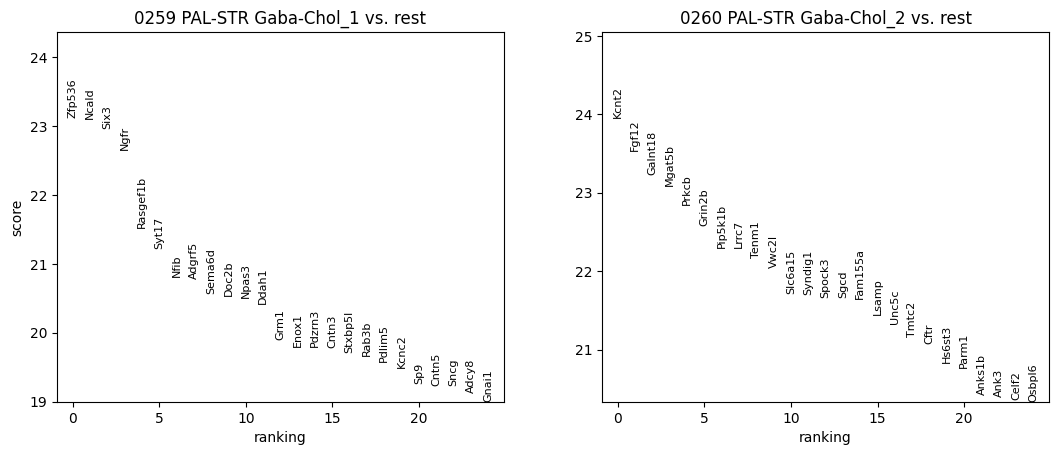

In [ ]:
# Using Scanpy toolkit, show top differentially expressed genes in between supertype 1 vs. supertype 2 and supertype 2 vs. supertype 1
sc.pl.rank_genes_groups(merged_adata, n_genes=25, sharey=False, key="wilcoxon") # change number of genes displayed in plots here by changing "25"

In [ ]:
# show me the top 5 differentially expressed genes in supertype 1 vs. supertype 2

top_degenes_1 = pd.DataFrame(merged_adata.uns["wilcoxon"]["names"])[supertype_1].iloc[:5] # change supertype number label here
print(top_degenes_1)


0      Zfp536
1       Ncald
2        Six3
3        Ngfr
4    Rasgef1b
Name: 0259 PAL-STR Gaba-Chol_1, dtype: object


In [ ]:
# show me the top 5 differentially expressed genes in supertype 2 vs. supertype 1
top_degenes_2 = pd.DataFrame(merged_adata.uns["wilcoxon"]["names"])[supertype_2].iloc[:5] # change supertype number label here
print(top_degenes_2)


0      Kcnt2
1      Fgf12
2    Galnt18
3     Mgat5b
4      Prkcb
Name: 0260 PAL-STR Gaba-Chol_2, dtype: object
